## **Cepheid Variables**

In [ ]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 47.0 MB/s eta 0:00:00


In [ ]:
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
def extract_dl_ind(datalink_dict, key, figsize = [15,5], fontsize = 12, linewidth = 2, show_legend = True, show_grid = True):
    ""
    "Extract individual DataLink products and export them to an Astropy Table"
    ""
    dl_out  = datalink_dict[key][0].to_table()
    if 'time' in dl_out.keys():
        plot_e_phot(dl_out, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = fontsize, show_legend = show_legend, show_grid = show_grid, figsize = figsize)
    if 'wavelength' in dl_out.keys():
        if len(dl_out) == 343:  title = 'XP Sampled'
        if len(dl_out) == 2401: title = 'RVS'
        plot_sampled_spec(dl_out, color = 'blue', title = title, fontsize = fontsize, show_legend = False, show_grid = show_grid, linewidth = linewidth, legend = '', figsize = figsize)
    return dl_out


def plot_e_phot(inp_table, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = 12, show_legend = True, show_grid = True, figsize = [15,5]):
    ""
    "Epoch photometry plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    fig      = plt.figure(figsize=figsize)
    xlabel   = f'JD date [{inp_table["time"].unit}]'
    ylabel   = f'magnitude [{inp_table["mag"].unit}]'
    gbands   = ['G', 'RP', 'BP']
    colours  = iter(colours)

    plt.gca().invert_yaxis()
    for band in gbands:
        phot_set = inp_table[inp_table['band'] == band]
        plt.plot(phot_set['time'], phot_set['mag'], 'o', label = band, color = next(colours))
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    plt.show()


def plot_sampled_spec(inp_table, color = 'blue', title = '', fontsize = 14, show_legend = True, show_grid = True, linewidth = 2, legend = '', figsize = [12,4], show_plot = True):
    ""
    "RVS & XP sampled spectrum plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    if show_plot:
        fig      = plt.figure(figsize=figsize)
    xlabel   = f'Wavelength [{inp_table["wavelength"].unit}]'
    ylabel   = f'Flux [{inp_table["flux"].unit}]'
    plt.plot(inp_table['wavelength'], inp_table['flux'], '-', linewidth = linewidth, label = legend)
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    if show_plot:
        plt.show()


def make_canvas(title = '', xlabel = '', ylabel = '', show_grid = False, show_legend = False, fontsize = 12):
    ""
    "Create generic canvas for plots"
    ""
    plt.title(title,    fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.ylabel(ylabel , fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize = fontsize*0.75)

In [ ]:
slopes = []
cept = []

for g in range(5,10):

  q = '''select top 10000 m.source_id, m.parallax, m.phot_bp_mean_mag, m.phot_rp_mean_mag, v.pf, m.phot_g_mean_mag
  from gaiadr3.gaia_source as m, gaiadr3.vari_cepheid as v
  where m.source_id = v.source_id and
  m.parallax is not null and
  m.has_epoch_photometry = 'True' and
  v.pf > 0 and
  m.parallax_over_error > {} and
  m.phot_g_mean_flux_over_error > {} and
  v.pf > {}*v.pf_error'''.format(g,g,np.log(g))

  job = Gaia.launch_job_async(q)
  r = job.get_results()

  x = -1
  appmags = r['phot_g_mean_mag']
  dist = 1000*np.reciprocal(r['parallax'])
  abmags = appmags + 5 - 5*np.log10(dist)

  pers = np.log(r['pf'])

  #pers = pers[np.where(r[])]
  #abmags = abmags[np.where(abmags < 3)]

  #brp = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
  #plt.figure(figsize=(8,8))
  #plt.scatter(pers[:x],abmags[:x], s=1)
  #plt.xlim(0,3)
  #plt.show

  def lin(z, m, c):
    return m*z - c

  params, covs = curve_fit(lin, pers[:x], abmags[:x])
  '''arr = np.linspace(np.min(pers),np.max(pers),40)
  fitted = [lin(i, params[0], params[1]) for i in arr]
  plt.plot(arr, fitted, color='orange')
  #plt.ylim(-1,2)
  plt.gca().invert_yaxis()
  plt.show()'''
  slopes.append(params[0])
  cept.append(params[1])

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
slopes

[-0.7384929086577929,
 -0.7260039248221482,
 -0.7348583911566559,
 -0.7612921199113787,
 -0.7482316033395595]

In [ ]:
cept

[-0.3668420637253033,
 -0.24634371091254503,
 -0.14771445599299074,
 -0.11040468289457706,
 -0.017859502363732682]

### **Finding Period Ourselves**

In [ ]:
g = 5
q = '''select m.source_id, m.parallax, m.phot_bp_mean_mag, m.phot_rp_mean_mag, v.pf, m.phot_g_mean_mag, v.pf
  from gaiadr3.gaia_source as m, gaiadr3.vari_cepheid as v
  where m.source_id = v.source_id and
  m.parallax is not null and
  m.has_epoch_photometry = 'True' and
  v.pf > 0 and
  m.parallax_over_error > 5 and
  m.phot_g_mean_flux_over_error > 5
  order by m.phot_g_mean_flux_over_error desc'''.format(g,g)

job = Gaia.launch_job_async(q)
r = job.get_results()
len(r)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


1450

In [ ]:
np.min(r['pf'])

0.5597106717764326

In [ ]:
retrieval_type = 'EPOCH_PHOTOMETRY'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'



datalink = Gaia.load_data(ids=r['source_id'], data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)
dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 1113929871645836672.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1208200864738741376.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1306279466601099904.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1328057184175359488.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1328057867076964864.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1328059413265281920.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1335461398554969472.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 154255575798532096.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1596081113587582464.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1659676827481828608.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1734124248699204096.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 174489098011145216.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1750217486861133440.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1765149340099555840.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1785352625740690432.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1789512215668452864.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 1808020329279916288.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 18116184080458008

In [ ]:
from astropy.timeseries import LombScargle

periods = []

for i in r['source_id']:
  dl_key   = 'EPOCH_PHOTOMETRY-Gaia DR3 {}.xml'.format(i) # Try out using other XP_Sampled or RVS products (e.g., 'XP_SAMPLED-Gaia DR3 4911590910260264960.xml')
  product  = datalink[dl_key][0]
  items    = [item for item in product.iter_fields_and_params()]

  if 'RVS' in dl_key or 'XP_SAMPLED' in dl_key:
      for item in items:
          print(item)
      print()
      print(f'Showing data for source_id: {product.get_field_by_id("source_id").value}')

  prod_tab = product.to_table()
  mask = prod_tab['band'] == 'G'
  prod_tab = prod_tab[mask]
  #dl_out  = extract_dl_ind(datalink, dl_key, figsize=[20,7])   # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.
  t = prod_tab['time']
  y = prod_tab['mag']
  t = t[np.where(~np.isnan(y))]
  y = y[np.where(~np.isnan(y))]

  #plt.figure(figsize=(20,7))
  #plt.plot(frequency,power)
  #plt.show()

  #
  frequency, power = LombScargle(list(t), list(y), dy=0.01).autopower(minimum_frequency=0.0005,
                                                   maximum_frequency=1.5
                                                  )

  periods.append((np.reciprocal(frequency[np.where(power == np.max(power))])[0]))
  print(prod_tab['source_id'][0], (np.reciprocal(frequency[np.where(power == np.max(power))])[0]))

455914562346088704 7.574117850777307
5884600426769582336 5.627574734163443
5309426652799793536 6.482367565318679
5888819699572539264 9.27233520506163
3029446630962736896 6.765266641516436
2172000322072006400 7.123056843940507
514393423999534336 7.1859263538048905
5951683791503848832 8.030122711784712
3119433991174191360 6.932097545436283
4756608527218082304 3.7775514155001817
2037378523542899840 9.754305307643913
2141004260338257792 7.226679785675851
4656427349891031936 10.661246531337365
2936274153063501824 6.386677010514372
2030637898807177344 5.697624713039329
511003320409595264 5.955032456426674
5409250351407633536 7.752429227213471
2009559470606505088 8.440319364443914
512524361613040640 8.37500218200896
4122508420491774976 7.950131687550529
5832238384516068224 6.192132883896167
2930603731082999296 5.458361419830666
5596993748557914624 7.173362921433576
5964452286916530560 6.156547595371621
3585871223384619648 0.7337899427550159
2005911737717923840 7.641256492330472
20746556098597

In [ ]:
appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)

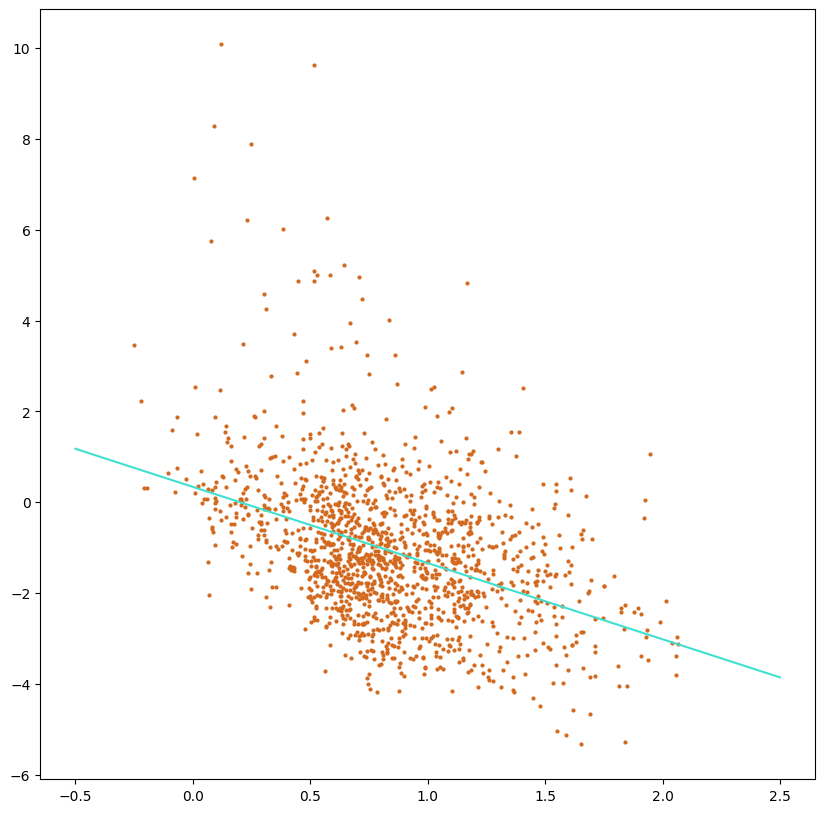

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(np.log10(r['pf']), abmags, s=4, color='chocolate')
plt.plot([-0.5,2.5], lin(np.array([-0.5,2.5]),params[0],params[1]),color='turquoise')
plt.show()

In [ ]:
np.corrcoef([np.log10(r['pf']), abmags])[0][1]

-0.40398552486488987

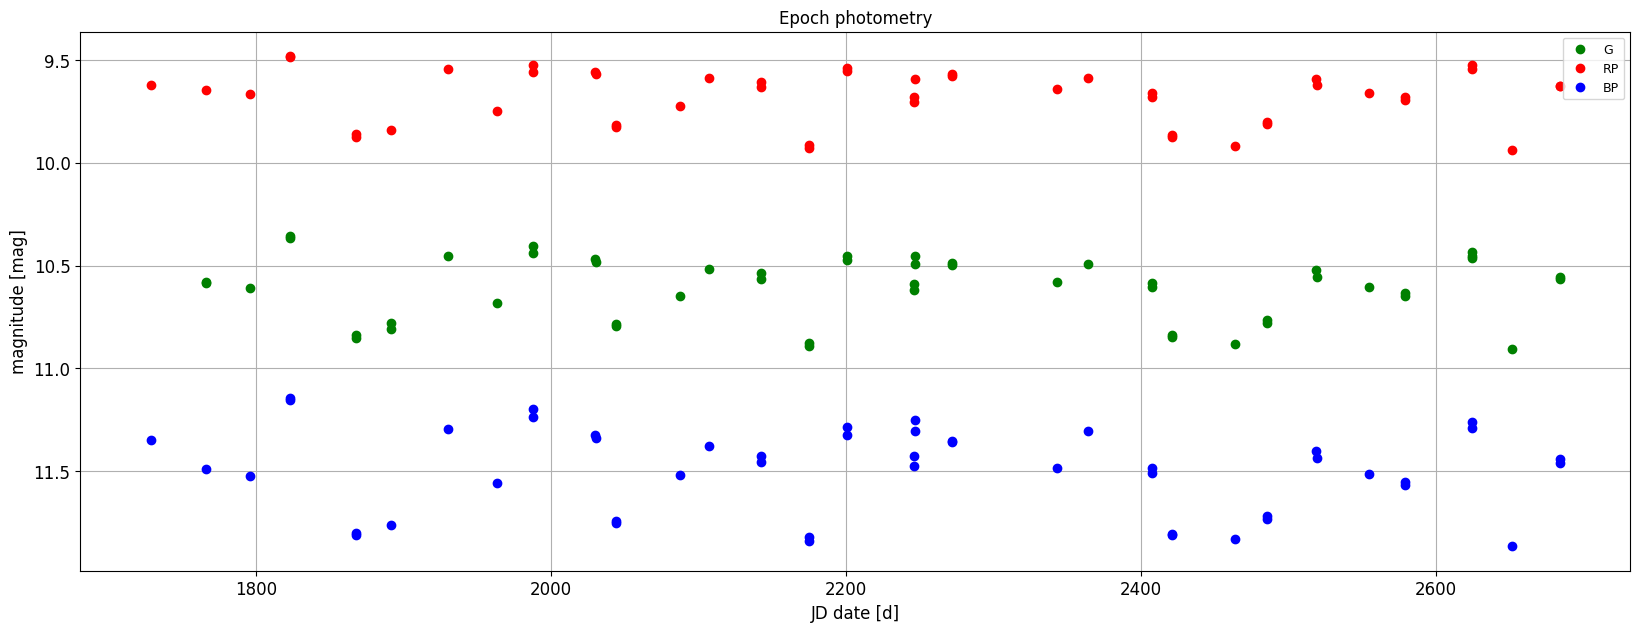

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
,,,d,mag,electron / s,electron / s,,,,,
int64,int64,object,float64,float64,float64,float64,float32,bool,bool,int64,int64
5544213926244557184,20412607362506788,G,1765.9949390462052,10.579553764052374,1104397.0583770734,2201.8097361264395,501.58606,False,False,7869409,375316653866487564
5544213926244557184,20416699656762510,G,1766.0690643723538,10.583938937782744,1099945.5111477158,1053.9873703525566,1043.6041,False,False,4097,375316653866487564
5544213926244557184,22056955551163764,G,1795.7338844250655,10.611263539155015,1072608.7393377258,842.5684819447757,1273.0226,False,False,1,375316653866487564
5544213926244557184,23577326329664039,G,1823.230226330694,10.36535138827963,1345259.8836818882,1390.3908282479322,967.54083,False,False,4097,375316653866487564
5544213926244557184,23581418606351824,G,1823.3042578601573,10.357594975636296,1354904.7226990936,1992.8024338442808,679.8992,False,False,12293,375316653866487564


In [ ]:
dl_key  = 'EPOCH_PHOTOMETRY-Gaia DR3 5544213926244557184.xml'
# dl_key  = 'MCMC_MSC-Gaia DR3 5924045608237672448.xml'
# dl_key  = 'MCMC_GSPPHOT-Gaia DR3 5924045608237672448.xml'
# dl_key  = 'XP_CONTINUOUS-Gaia DR3 4911590910260264960.xml'
# dl_key  = 'RVS-Gaia DR3 6196457933368101888.xml'
# dl_key  = 'XP_SAMPLED-Gaia DR3 6196457933368101888.xml'

dl_out  = extract_dl_ind(datalink, dl_key, figsize=[20,7])   # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.
dl_out[0:5]

In [ ]:
def lin(x, m, c):
    return m*x + c

params, covs = curve_fit(lin, np.log10(periods), abmags)
covs

array([[ 0.01037052, -0.008655  ],
       [-0.008655  ,  0.0087895 ]])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


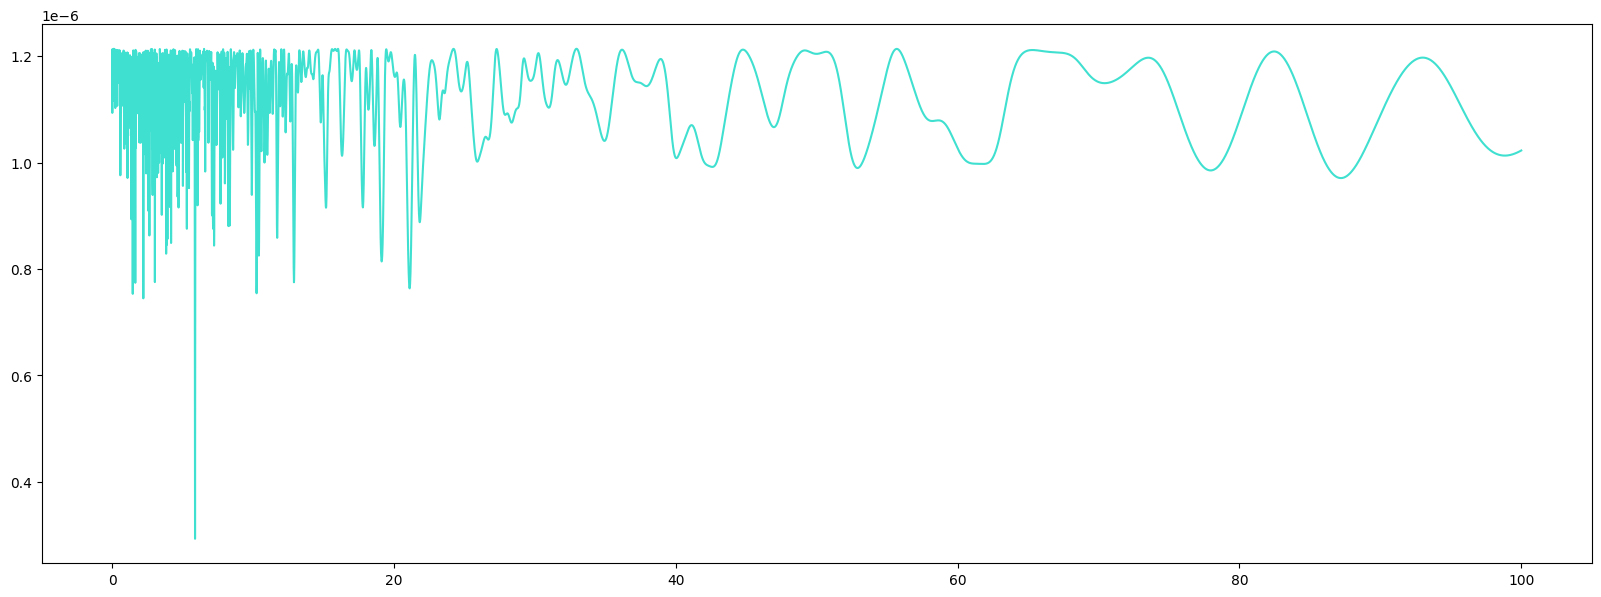

In [ ]:
def per(x, A, phi):
  #freq = 0.002
  return c + A*np.sin(2*np.pi*freq*x + phi)# + A2*np.cos(2*np.pi*freq*x)

#days = np.concatenate((np.linspace(0.01,100,10000),np.flip(np.reciprocal(np.linspace(0.00025,0.0100,9976)))))
days = np.linspace(0.01,100,10000)
freqs = np.reciprocal(days)

c = np.mean(y)
mmse = []
for j in freqs:
  freq = j
  params, covs = curve_fit(per, t, y)#, bounds = ([-1000,-1000,0.001],[1000,1000,1.1]))
  sumsquares = 0
  fits = [per(i, params[0], params[1]) for i in t]
  for n in range(len(t)):
    sumsquares += (fits[n] - y[n])**2
  mmse.append(sumsquares)

#days[np.where(mmse == np.min(mmse))]
plt.figure(figsize=(20,7))
plt.plot(days,np.array(mmse)/1000000, color='turquoise')
plt.show()

In [ ]:
days[np.where(mmse == np.min(mmse))]

array([5.89])

In [ ]:
r['pf'][-1]

5.884906729518966

5.889491779130282


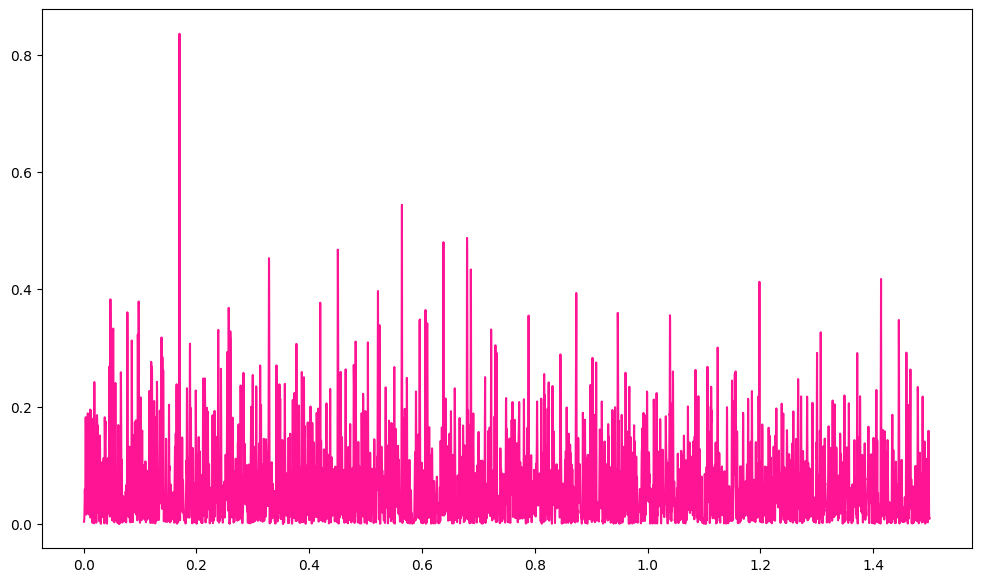

In [ ]:
frequency, power = LombScargle(list(t), list(y), dy=0.01).autopower(minimum_frequency=0.0005,
                                                   maximum_frequency=1.5
                                                  )
print((np.reciprocal(frequency[np.where(power == np.max(power))])[0]))
plt.figure(figsize=(12,7))
plt.plot(frequency, power, color='deeppink')
plt.show()